<a href="https://colab.research.google.com/github/kcw0331/Deeplearning/blob/main/transfer_learning_with_hub(%EA%B9%80%EC%B0%BD%EC%9A%B0)4%EC%9B%947%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 텐서플로 허브와 전이학습

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/images/transfer_learning_with_hub.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/images/transfer_learning_with_hub.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/images/transfer_learning_with_hub.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: 이 문서는 텐서플로 커뮤니티에서 번역했습니다. 커뮤니티 번역 활동의 특성상 정확한 번역과 최신 내용을 반영하기 위해 노력함에도
불구하고 [공식 영문 문서](https://www.tensorflow.org/?hl=en)의 내용과 일치하지 않을 수 있습니다.
이 번역에 개선할 부분이 있다면
[tensorflow/docs-l10n](https://github.com/tensorflow/docs-l10n/) 깃헙 저장소로 풀 리퀘스트를 보내주시기 바랍니다.
문서 번역이나 리뷰에 참여하려면
[docs-ko@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ko)로
메일을 보내주시기 바랍니다.

[텐서플로 허브](http://tensorflow.org/hub)텐서플로 허브는 이 전에 학습된 모델들의 요소들을 공유하는 하나의 방법입니다. 학습된 모델들의 검색가능한 리스트에 대한 [텐서플로 모듈 허브] (https://tfhub.dev/)를 보세요. 이 튜토리얼은 입증합니다:

1. `tf.keras`로 텐서플로 허브를 사용하는 방법.
1. 텐서플로 허브를 사용하여 이미지 분류를 하는 방법.
1. 간단한 전이학습을 하는 방법.

## 설치하기


In [ ]:
import matplotlib.pylab as plt

import tensorflow as tf

In [ ]:
!pip install -U tf-hub-nightly
import tensorflow_hub as hub  #hub를 설치해준다.

from tensorflow.keras import layers

     |████████████████████████████████| 112kB 17.6MB/s 


## ImageNet 분류기


### 분류기 다운로드하기

이동 네트워크 컴퓨터를 로드하기 위해 `hub.module`을, 그리고 하나의 keras층으로 감싸기 위해 `tf.keras.layers.Lambda`를 사용하세요. Fthub.dev의 [텐서플로2.0 버전의 양립 가능한 이미지 분류기 URL](https://tfhub.dev/s?q=tf2&module-type=image-classification) 는 이곳에서 작동할 것입니다.

In [ ]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

- 여기에서는 텐서플로우에 있는 mobilnet_v2를 가지고 모형을 적용시키려고 하고 있다. 

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([   #여기에서는 classifier를 tr.keras.Sequntial로 해서 하고
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,)) #classifier_url, input_shape
])

- 224, 224를 해줘서 build를 해주었다. 

### 싱글 이미지 실행시키기


모델을 시도하기 위해 싱글 이미지를 다운로드하세요.

65536/61306 [================================] - 0s 0us/step


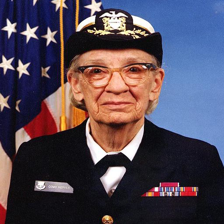

In [ ]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

- 그리고 여기에서는 grace_hopper라는 사람의 이미지를 다운받는다.

In [ ]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

차원 배치를 추가하세요, 그리고 이미지를 모델에 통과시키세요.

In [ ]:
result = classifier.predict(grace_hopper[np.newaxis, ...]) #텐서플로우 허브에서 받아온 classifier로 얘를 predict한 다음에 
result.shape

(1, 1001)

그 결과는 로지트의 1001 요소 벡터입니다. 이는 이미지에 대한 각각의 클래스 확률을 계산합니다.

그래서 탑 클래스인 ID는 최대값을 알 수 있습니다:

In [ ]:
predicted_class = np.argmax(result[0], axis=-1)  #그 class 정보를 확인해 보면 
predicted_class

653

### 예측 해독하기

우리는 클래스 ID를 예측하고,
`ImageNet`라벨을 불러오고, 그리고 예측을 해독합니다.

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


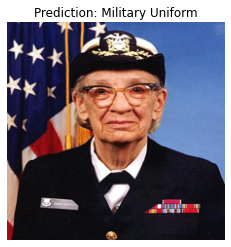

In [ ]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

- 653의 predication을 보면 Military Uniform이 나오는 것을 볼 수 있다. 
- 그래서 이렇게 나오는 것을 확인해 볼 수 있다. 

## 간단한 전이 학습


텐서플로 허브를 사용함으로써, 우리의 데이터셋에 있는 클래스들을 인지하기 위해 모델의 최상위 층을 재학습 시키는 것이 쉬워졌습니다.

### 데이터셋

 이 예제를 해결하기 위해, 텐서플로의 flowers 데이터셋을 사용할 것입니다:

In [ ]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)  

228818944/228813984 [==============================] - 1s 0us/step


- 여기에서는 텐서플로우 허브를 통해서 flower_photos을 가지고 확인을 해본다.

우리의 모델에 이 데이터를 가장 간단하게 로딩 하는 방법은 `tf.keras.preprocessing.image.image.ImageDataGenerator`를 사용하는 것이고,

모든 텐서플로 허브의 이미지 모듈들은 0과 1사이의 상수들의 입력을 기대합니다. 이를 만족 시키기 위해 `ImageDataGenerator`의 `rescale`인자를 사용하세요.

그 이미지의 사이즈는 나중에 다뤄질 것입니다.

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


- 여기에서는 ImageDataGenerator를 사용하였고, flow_from_directory(str(data_root)를 하였다.
- 그리고 3670개가 나오는 것을 볼 수 있다. 

결과로 나온 오브젝트는 `image_batch`와 `label_batch`를 같이 리턴 하는 반복자입니다.

In [ ]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


- 그리고 batch를 하나 가져와서 shape을 봐준거고 

### 이미지 배치에 대한 분류기를 실행해보자


이제 이미지 배치에 대한 분류기를 실행해봅시다.

In [ ]:
result_batch = classifier.predict(image_batch)  #이제 여기에서는 분류기를 실행해줘서 어떤 predotion을 하는지 보면은 
result_batch.shape

(32, 1001)

In [ ]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['bee', 'guillotine', 'daisy', 'bee', 'daisy', 'limpkin', 'cardoon',
       'handkerchief', 'cardoon', 'daisy', 'daisy', 'hummingbird',
       'daisy', 'hip', 'daisy', 'vase', 'daisy', 'sea urchin', 'daisy',
       'mushroom', "yellow lady's slipper", 'paintbrush', 'ice cream',
       'daisy', 'honeycomb', 'sea urchin', 'hair slide', 'buckeye',
       'artichoke', 'daisy', 'daisy', "jack-o'-lantern"], dtype='<U30')

- 이런식으로 predition을 하고 있다는 것을 볼 수 있다. 

얼마나 많은 예측들이 이미지에 맞는지 검토해봅시다:

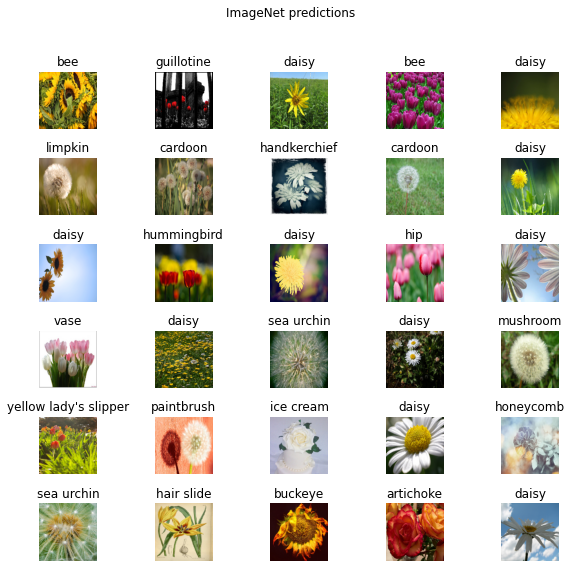

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

이미지 속성을 가진 `LICENSE.txt` 파일을 보세요.

결과가 완벽과는 거리가 멀지만, 모델이 ("daisy"를 제외한) 모든 것을 대비해서 학습된 클래스가 아니라는 것을 고려하면 합리적입니다.

### 헤드리스 모델을 다운로드하세요

텐서플로 허브는 맨 위 분류층이 없어도 모델을 분배 시킬 수 있습니다. 이는 전이 학습을 쉽게 할 수 있게 만들었습니다.

fthub.dev의 [텐서플로 2.0버전의 양립 가능한 이미지 특성 벡터 URL](https://tfhub.dev/s?module-type=image-feature-vector&q=tf2) 은 모두 이 곳에서 작동할 것입니다.

In [ ]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

- 해드리스를 다운받아서 하는 모델이다.

특성 추출기를 만들어봅시다.

In [ ]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

- 여기에서 추출기를 만들고 

이 것은 각각의 이미지마다 길이가 1280인 벡터가 반환됩니다:

In [ ]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


- 특성은 32, 1280이 된다. 

특성 추출기 계층에 있는 변수들을 굳히면, 학습은 오직 새로운 분류 계층만 변경시킬 수 있습니다.

In [ ]:
feature_extractor_layer.trainable = False

- 여기에서 feature_extractor_layer.trainable이것을 False해서 만든다음에 

### 분류 head를 붙이세요.

이제 `tf.keras.Sequential` 모델에 있는 허브 계층을 포장하고, 새로운 분류 계층을 추가하세요.

In [ ]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


- 여기에서는 head를 간단하게 Dense layer하나만 달아서 지금 5개의 클래스를 분류하고자하니깐 

In [ ]:
predictions = model(image_batch)

In [ ]:
predictions.shape

TensorShape([32, 5])

### 모델을 학습시키세요

학습 과정 환경을 설정하기 위해 컴파일을 사용하세요:

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

이제 모델을 학습시키기 위해 `.fit`방법을 사용하세요.

예제를 짧게 유지시키기 위해 오로지 2세대만 학습시키세요. 학습 과정을 시각화하기 위해서, 맞춤형 회신을 사용하면 손실과, 세대 평균이 아닌 배치 개별의 정확도를 기록할 수 있습니다.

In [ ]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [ ]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(image_data, epochs=2,
                              steps_per_epoch=steps_per_epoch,
                              callbacks = [batch_stats_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
115/115 [==============================] - 16s 116ms/step - loss: 0.6595 - acc: 0.7604
Epoch 2/2
115/115 [==============================] - 13s 113ms/step - loss: 0.3359 - acc: 0.8906


지금부터, 단순한 학습 반복이지만, 우리는 항상 모델이 프로세스를 만드는 중이라는 것을 알 수 있습니다.

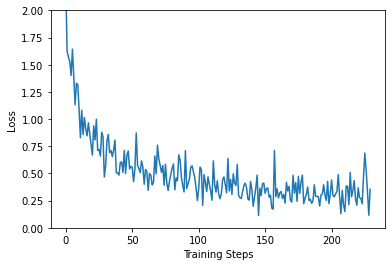

In [ ]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

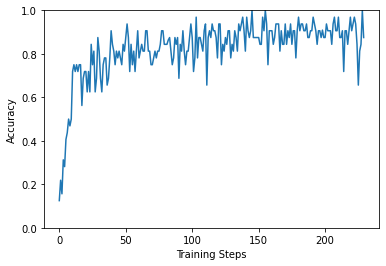

In [ ]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

### 예측을 확인하세요

이 전의 계획을 다시하기 위해서, 클래스 이름들의 정렬된 리스트를 첫번째로 얻으세요:

In [ ]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

모델을 통해 이미지 배치를 실행시키세요. 그리고 인덱스들을 클래스 이름으로 바꾸세요.

In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

결과를 계획하세요

In [ ]:
label_id = np.argmax(label_batch, axis=-1)

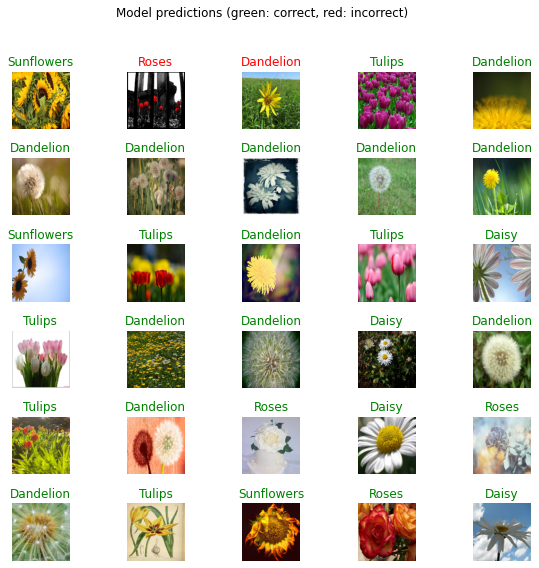

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

## 당신의 모델을 내보내세요  #<-이거는 skip하심.

당신은 모델을 학습시켜왔기 때문에, 저장된 모델을 내보내세요:

In [ ]:
import time
t = time.time()

export_path = "/tmp/saved_models/{}".format(int(t))
model.save(export_path, save_format='tf')

export_path

이제 우리는 그것을 새롭게 로딩 할 수 있고, 이는 같은 결과를 줄 것입니다:

In [ ]:
reloaded = tf.keras.models.load_model(export_path)

In [ ]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

In [ ]:
abs(reloaded_result_batch - result_batch).max()

저장된 모델은 추후에 추론을 할 수도 있고, [TFLite](https://www.tensorflow.org/lite/convert/) 나 [TFjs](https://github.com/tensorflow/tfjs-converter) 로 변환할 수 있습니다.
